In [90]:
%matplotlib inline

In [88]:
import pandas as pd
import requests
import json
import io
import matplotlib.pyplot as plt
import numpy as np

# GDC endpoint

In [77]:
cases_endpt = 'https://api.gdc.cancer.gov/cases'
proj_endpt = 'https://api.gdc.cancer.gov/projects/TCGA-LIHC?expand=summary,summary.experimental_strategies,summary.data_categories&pretty=true'

# The 'fields' parameter is passed as a comma-separated string of single names.
fields = [
    "submitter_id",
    "case_id",
    "primary_site",
    "disease_type",
    "vital_status",
    'cases.diagnoses.state',
    'state',
    'demographic.created_datetime',
'demographic.demographic_id',
'demographic.ethnicity',
'demographic.gender',
'demographic.race',
'demographic.state',
'demographic.submitter_id',
'demographic.updated_datetime',
'demographic.year_of_birth',
'demographic.year_of_death',
'diagnoses.age_at_diagnosis',
'diagnoses.classification_of_tumor',
'diagnoses.created_datetime',
'diagnoses.days_to_birth',
'diagnoses.days_to_death',
'diagnoses.days_to_last_follow_up',
'diagnoses.days_to_last_known_disease_status',
'diagnoses.days_to_recurrence',
'diagnoses.diagnosis_id',
'diagnoses.last_known_disease_status',
'diagnoses.morphology',
'diagnoses.primary_diagnosis',
'diagnoses.prior_malignancy',
'diagnoses.progression_or_recurrence',
'diagnoses.site_of_resection_or_biopsy',
'diagnoses.state',
'diagnoses.submitter_id',
'diagnoses.tissue_or_organ_of_origin',
'diagnoses.tumor_grade',
'diagnoses.tumor_stage',
'diagnoses.updated_datetime',
'diagnoses.vital_status',
'diagnoses.treatments.created_datetime',
'diagnoses.treatments.days_to_treatment',
'diagnoses.treatments.state',
'diagnoses.treatments.submitter_id',
'diagnoses.treatments.therapeutic_agents',
'diagnoses.treatments.treatment_id',
'diagnoses.treatments.treatment_intent_type',
'diagnoses.treatments.treatment_or_therapy',
'diagnoses.treatments.updated_datetime',
    ]

fields = ','.join(fields)

filters = {
    "op": "and",
    "content":[
        {
        "op": "in",
        "content":{
            "field": "cases.project.primary_site",
            "value": ["Liver and intrahepatic bile ducts"]
            }
        },
#         {
#         "op": "in",
#         "content":{
#             "field": "files.experimental_strategy",
#             "value": ["RNA-Seq"]
#             }
#         },
        {
        "op": "in",
        "content":{
            "field": "cases.project.project_id",
            "value": ["TCGA-LIHC"]
            }
        }
    ]
}

params = {
    "filters": json.dumps(filters),
    "fields": fields,
    "format": "csv",
    "size": "1000",
    }


response = requests.get(cases_endpt, params = params)

print(response.content)

b'diagnoses.0.days_to_recurrence,demographic.submitter_id,diagnoses.0.treatments.1.treatment_id,diagnoses.0.morphology,submitter_id,diagnoses.0.treatments.0.treatment_intent_type,diagnoses.0.primary_diagnosis,id,diagnoses.0.treatments.0.state,diagnoses.0.treatments.1.created_datetime,diagnoses.0.treatments.1.treatment_or_therapy,diagnoses.0.age_at_diagnosis,demographic.year_of_birth,diagnoses.0.days_to_last_known_disease_status,diagnoses.0.days_to_last_follow_up,demographic.gender,diagnoses.0.classification_of_tumor,diagnoses.0.progression_or_recurrence,case_id,diagnoses.0.treatments.0.updated_datetime,diagnoses.0.state,diagnoses.0.treatments.1.updated_datetime,diagnoses.0.tumor_stage,demographic.demographic_id,diagnoses.0.submitter_id,demographic.race,diagnoses.0.last_known_disease_status,diagnoses.0.site_of_resection_or_biopsy,diagnoses.0.treatments.0.submitter_id,diagnoses.0.diagnosis_id,diagnoses.0.treatments.0.treatment_or_therapy,demographic.year_of_death,diagnoses.0.created_date

In [78]:
df = pd.read_csv(io.BytesIO(response.content))
df.columns = [col.replace('.0', '').replace('.1', '') for col in df.columns]
df

,diagnoses.days_to_recurrence,demographic.submitter_id,diagnoses.treatments.treatment_id,diagnoses.morphology,submitter_id,diagnoses.treatments.treatment_intent_type,diagnoses.primary_diagnosis,id,diagnoses.treatments.state,diagnoses.treatments.created_datetime,...,diagnoses.treatments.submitter_id,demographic.created_datetime,diagnoses.treatments.treatment_intent_type,diagnoses.prior_malignancy,demographic.updated_datetime,primary_site,diagnoses.treatments.therapeutic_agents,diagnoses.updated_datetime,demographic.state,diagnoses.treatments.treatment_id
0,NaN,TCGA-DD-AADM_demographic,d2011ad3-bbca-5f2a-a646-4c39ab7f6e50,8170/3,TCGA-DD-AADM,NaN,"Hepatocellular carcinoma, NOS",62c02da8-e4b4-4294-9923-8992d187fc7b,released,NaN,...,TCGA-DD-AADM_treatment,NaN,NaN,no,2019-04-28T13:20:26.737322-05:00,Liver and intrahepatic bile ducts,NaN,2019-05-01T12:36:42.289685-05:00,released,fa555b9e-bfc5-5c0e-9e23-c71a219985cc
1,NaN,TCGA-MR-A520_demographic,e4c42bee-c60c-55e3-ab8a-b0466b7800d3,8170/3,TCGA-MR-A520,NaN,"Hepatocellular carcinoma, NOS",25e893ad-a0fd-45ae-9aa9-9bcd7c2ec8e5,released,2019-04-28T13:16:22.558732-05:00,...,TCGA-MR-A520_treatment_1,NaN,NaN,no,2019-04-28T13:16:22.558732-05:00,Liver and intrahepatic bile ducts,NaN,2019-05-01T12:37:53.093878-05:00,released,e318f368-87c5-5de7-8ca3-c799aeeb0cdd
2,NaN,TCGA-DD-AAW2_demographic,a4ac4bf7-2759-5302-91d3-a0b1d7324c02,8170/3,TCGA-DD-AAW2,NaN,"Hepatocellular carcinoma, NOS",03df105e-a005-4577-bfdb-9644758d778e,released,2019-04-28T13:14:08.134677-05:00,...,TCGA-DD-AAW2_treatment_1,NaN,NaN,no,2019-04-28T13:14:08.134677-05:00,Liver and intrahepatic bile ducts,NaN,2019-05-01T12:37:05.743590-05:00,released,9bd0e639-14db-5b89-b0a4-f4784e34bc2e
3,NaN,TCGA-2Y-A9GZ_demographic,2e637e2b-6f22-5a1c-91cf-c925926755a0,8170/3,TCGA-2Y-A9GZ,NaN,"Hepatocellular carcinoma, NOS",0e8c3831-def9-4efa-9f93-8942072d6a77,released,NaN,...,TCGA-2Y-A9GZ_treatment,NaN,NaN,no,2019-04-28T13:14:41.005191-05:00,Liver and intrahepatic bile ducts,NaN,2019-05-01T12:35:35.448559-05:00,released,fae58ba4-ab4b-5145-8e0f-be4a51af8e7d
4,NaN,TCGA-LG-A6GG_demographic,6fe0674b-d337-5cc1-8132-67a443930c31,8170/3,TCGA-LG-A6GG,NaN,"Hepatocellular carcinoma, NOS",c618da6d-3c66-4a6a-8832-3526a3b75410,released,2019-04-28T13:26:16.469340-05:00,...,TCGA-LG-A6GG_treatment_1,NaN,NaN,yes,2019-04-28T13:26:16.469340-05:00,Liver and intrahepatic bile ducts,NaN,2019-05-01T12:37:53.093878-05:00,released,4d1b37ee-01fd-5145-8848-1ab507e09597
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372,NaN,TCGA-DD-AADQ_demographic,eb5ad258-996e-5fc9-be89-3a7e322c5878,8170/3,TCGA-DD-AADQ,NaN,"Hepatocellular carcinoma, NOS",485d283a-552c-485a-84fb-3abdb98dc797,released,NaN,...,TCGA-DD-AADQ_treatment,NaN,NaN,no,2019-04-28T13:18:42.293199-05:00,Liver and intrahepatic bile ducts,NaN,2019-05-01T12:37:05.743590-05:00,released,1cc25911-88ca-5952-93ce-2f470964b055
373,NaN,TCGA-KR-A7K8_demographic,5bcd6913-4137-58f3-88fa-6636b5e48c57,8170/3,TCGA-KR-A7K8,NaN,"Hepatocellular carcinoma, NOS",4b0e544c-4090-4ebb-b3e5-2623aa91356c,released,2019-04-28T13:18:51.969934-05:00,...,TCGA-KR-A7K8_treatment_1,NaN,NaN,no,2019-04-28T13:18:51.969934-05:00,Liver and intrahepatic bile ducts,NaN,2019-05-01T12:37:53.093878-05:00,released,5d00b529-0e89-581c-b51e-6a0223e8699f
374,NaN,TCGA-DD-AAW3_demographic,fcfb6d92-4761-5a9d-b6a0-1153f0bf381c,8170/3,TCGA-DD-AAW3,NaN,"Hepatocellular carcinoma, NOS",564b4f4d-3c18-40d5-9d95-916774df600c,released,NaN,...,TCGA-DD-AAW3_treatment,NaN,NaN,no,2019-04-28T13:19:40.113809-05:00,Liver and intrahepatic bile ducts,NaN,2019-05-01T12:37:05.743590-05:00,released,3b2bf89c-d479-5b23-8fa1-6c2c2149445e
375,NaN,TCGA-DD-AAVS_demographic,fd3a0556-8f6d-5500-acdc-9481f0588b1c,8170/3,TCGA-DD-AAVS,NaN,"Hepatocellular carcinoma, NOS",9fc30c21-2c78-4843-a658-fe84a64b8fad,released,2019-04-28T13:23:51.044821-05:00,...,TCGA-DD-AAVS_treatment_1,NaN,NaN,no,2019-04-28T13:23:51.044821-05:00,Liver and intrahepatic bile ducts,NaN,2019-05-0

# Clinical data

In [84]:
clinpat = pd.read_csv('/Users/mattheweng/Downloads/TCGA-LIHC Clinical Data 1516/nationwidechildrens.org_clinical_patient_lihc.txt', sep='\t')
clinpat.columns

Index(['bcr_patient_uuid', 'bcr_patient_barcode', 'form_completion_date',
       'prospective_collection', 'retrospective_collection', 'gender',
       'height_cm_at_diagnosis', 'weight_kg_at_diagnosis', 'race', 'ethnicity',
       'history_other_malignancy', 'history_neoadjuvant_treatment',
       'tumor_status', 'vital_status', 'family_history_cancer_indicator',
       'family_history_cancer_number_relatives',
       'history_hepato_carcinoma_risk_factors',
       'other_hepato_carcinoma_risk_factors', 'viral_hepatitis_serology',
       'radiation_treatment_adjuvant', 'pharmaceutical_tx_adjuvant',
       'ablation_embolization_tx_adjuvant', 'histologic_diagnosis',
       'definitive_surgical_procedure', 'tumor_grade', 'residual_tumor',
       'ajcc_staging_edition', 'ajcc_tumor_pathologic_pt',
       'ajcc_nodes_pathologic_pn', 'ajcc_metastasis_pathologic_pm',
       'ajcc_pathologic_tumor_stage', 'vascular_invasion',
       'child_pugh_classification', 'alpha_fetoprotien_at_procurem

In [100]:
clinpat.death_days_to.apply(lambda x: 5000 if x == ')

0        days_to_death
1       CDE_ID:3165475
2     [Not Applicable]
3                   91
4                  770
            ...       
62    [Not Applicable]
63                 373
64                   9
65                2456
66    [Not Applicable]
Name: death_days_to, Length: 67, dtype: object

0     5000
1     5000
2     5000
3       91
4      770
      ... 
62    5000
63     373
64       9
65    2456
66    5000
Name: death_days_to, Length: 67, dtype: int64

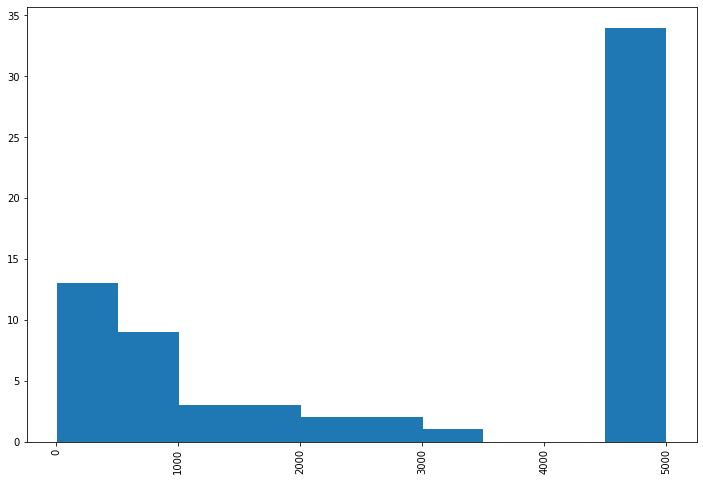

In [102]:
# Histogram of survival data
days_to_death = clinpat.death_days_to.apply(lambda x: int(x) if x not in ['days_to_death', '[Not Applicable]', 'CDE_ID:3165475'] else 5000)

fig = plt.figure(figsize=(12,8))
plt.hist(days_to_death)
plt.xticks(rotation=90);

Text(0.5, 1.0, 'Surviving patients x days after diagnoses')

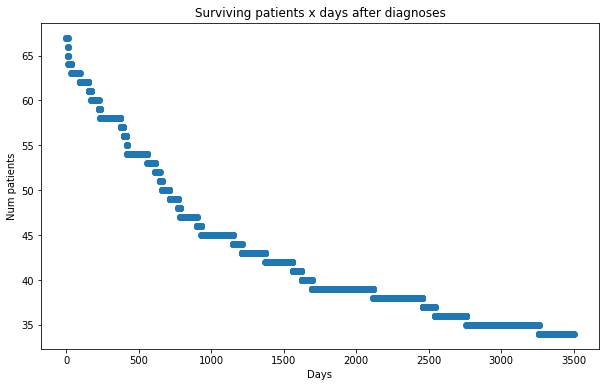

In [124]:
# Survival scatterplot
def f(x):
    days_to_death = clinpat.death_days_to.apply(lambda x: int(x) if x not in ['days_to_death', '[Not Applicable]', 'CDE_ID:3165475'] else 5000)
    return sum(days_to_death >= x)

x = np.arange(3500)
y = np.array(list(map(f, x)))

fig = plt.figure(figsize=(10,6))
plt.scatter(x, y)
plt.xlabel('Days')
plt.ylabel('Num patients')
plt.title('Surviving patients x days after diagnoses')

# RNA-seq data